In [1]:
import pandas as pd

In [4]:
%ls

 驱动器 G 中的卷是 编程
 卷的序列号是 244E-B70C

 G:\PythonProjects\tianchi\shop 的目录

2017/10/26  13:45    <DIR>          .
2017/10/26  13:45    <DIR>          ..
2017/10/26  13:38    <DIR>          .ipynb_checkpoints
2017/10/15  13:06           380,725 ccf_first_round_shop_info.csv
2017/10/15  13:22       295,012,267 ccf_first_round_user_shop_behavior.csv
2017/10/26  13:45            27,681 dataview.ipynb
2017/10/16  12:28    <DIR>          document
2017/10/15  13:16       127,852,518 evaluation_public.csv
2017/10/21  12:13         8,131,181 submission_v1.csv
2017/10/21  12:13         8,159,796 wifi_baseline.csv
2017/10/21  12:12             1,955 wifi_baseline.py
2017/10/26  13:38            25,106 规则baseline说明文档.ipynb
               8 个文件    439,591,229 字节
               4 个目录 123,847,458,816 可用字节


In [5]:
shop_info = pd.read_csv("ccf_first_round_shop_info.csv")

In [6]:
shop_info.head()

,shop_id,category_id,longitude,latitude,price,mall_id
0,s_26,c_4,122.346736,31.833507,57,m_690
1,s_133,c_6,121.134362,31.197511,58,m_6587
2,s_251,c_38,121.000505,30.907667,34,m_5892
3,s_372,c_30,119.864982,26.659876,44,m_625
4,s_456,c_26,122.594243,31.581499,44,m_3839


In [7]:
shop_info.count()

shop_id        8477
category_id    8477
longitude      8477
latitude       8477
price          8477
mall_id        8477
dtype: int64

In [11]:
import numpy as np
np.where(shop_info.isnull().any())

(array([], dtype=int64),)

In [13]:
len(shop_info['shop_id'].unique())

8477

In [14]:
# 店铺类型总数
len(shop_info['category_id'].unique())

67

In [18]:
# 绘图看看
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import datetime
import time

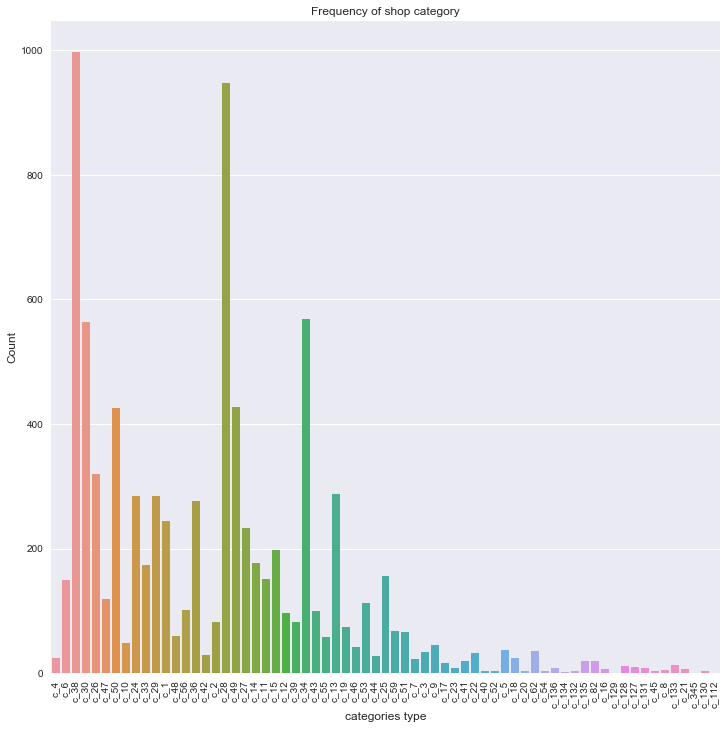

Frequency of shop type is:[('c_38', 997), ('c_28', 947), ('c_34', 569), ('c_30', 563), ('c_49', 428), ('c_50', 425), ('c_26', 320), ('c_13', 287), ('c_24', 285), ('c_29', 284), ('c_36', 276), ('c_1', 245), ('c_27', 233), ('c_15', 197), ('c_14', 177), ('c_33', 174), ('c_25', 156), ('c_11', 151), ('c_6', 149), ('c_47', 119), ('c_53', 113), ('c_56', 102), ('c_43', 100), ('c_12', 97), ('c_2', 83), ('c_39', 83), ('c_19', 74), ('c_59', 68), ('c_51', 67), ('c_48', 60), ('c_55', 58), ('c_10', 49), ('c_9', 46), ('c_46', 42), ('c_5', 38), ('c_62', 36), ('c_3', 34), ('c_22', 32), ('c_42', 29), ('c_44', 28), ('c_4', 25), ('c_18', 25), ('c_7', 23), ('c_41', 19), ('c_135', 19), ('c_82', 19), ('c_17', 16), ('c_133', 14), ('c_128', 12), ('c_127', 10), ('c_23', 8), ('c_136', 8), ('c_131', 8), ('c_16', 7), ('c_21', 7), ('c_8', 6), ('c_52', 4), ('c_20', 4), ('c_132', 4), ('c_45', 4), ('c_40', 3), ('c_54', 3), ('c_130', 3), ('c_134', 2), ('c_129', 1), ('c_345', 1), ('c_112', 1)]


In [20]:
plt.figure(figsize=(12,12))
plt.subplot(111)
category_count = shop_info['category_id'].unique()
sns.countplot(x="category_id", data=shop_info, order=category_count)
plt.xlabel("categories type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation="vertical")
plt.title("Frequency of shop category")
plt.show()
category_count_info = Counter(shop_info["category_id"]).most_common()
print("Frequency of shop type is:"+str(category_count_info))

In [21]:
# 人均消费指数
len(shop_info["price"].unique())

54

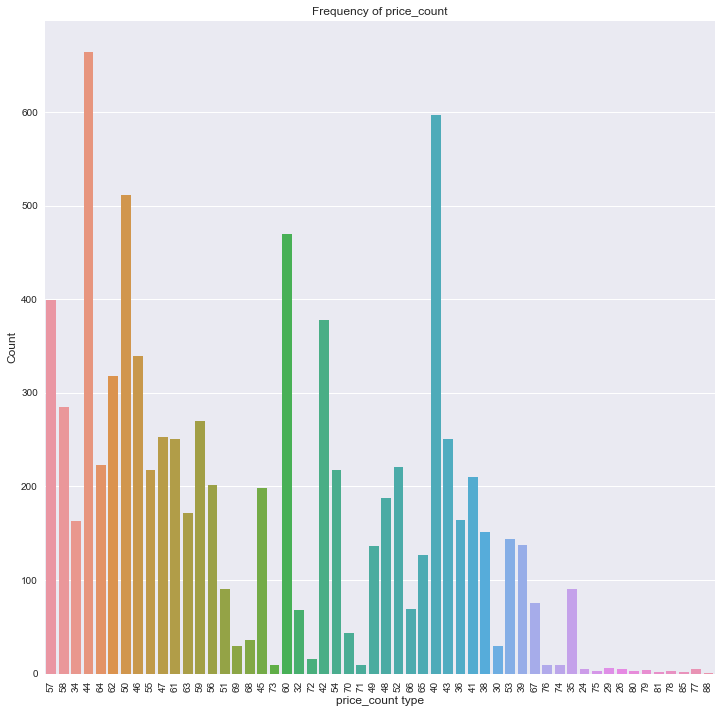

Frequency of price_count is:[(44, 664), (40, 597), (50, 511), (60, 470), (57, 399), (42, 378), (46, 339), (62, 318), (58, 285), (59, 270), (47, 253), (61, 251), (43, 251), (64, 223), (52, 221), (55, 218), (54, 218), (41, 210), (56, 202), (45, 198), (48, 188), (63, 172), (36, 164), (34, 163), (38, 151), (53, 144), (39, 137), (49, 136), (65, 127), (51, 90), (35, 90), (67, 75), (66, 69), (32, 68), (70, 43), (68, 36), (69, 29), (30, 29), (72, 15), (73, 9), (71, 9), (76, 9), (74, 9), (29, 6), (24, 5), (26, 5), (77, 5), (79, 4), (75, 3), (80, 3), (78, 3), (81, 2), (85, 2), (88, 1)]


In [25]:
plt.figure(figsize=(12,12))
plt.subplot(111)
price_count = shop_info['price'].unique()
sns.countplot(x="price", data=shop_info, order=price_count)
plt.xlabel("price_count type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation="vertical")
plt.title("Frequency of price_count")
plt.show()
price_count_info = Counter(shop_info["price"]).most_common()
print("Frequency of price_count is:"+str(price_count_info))

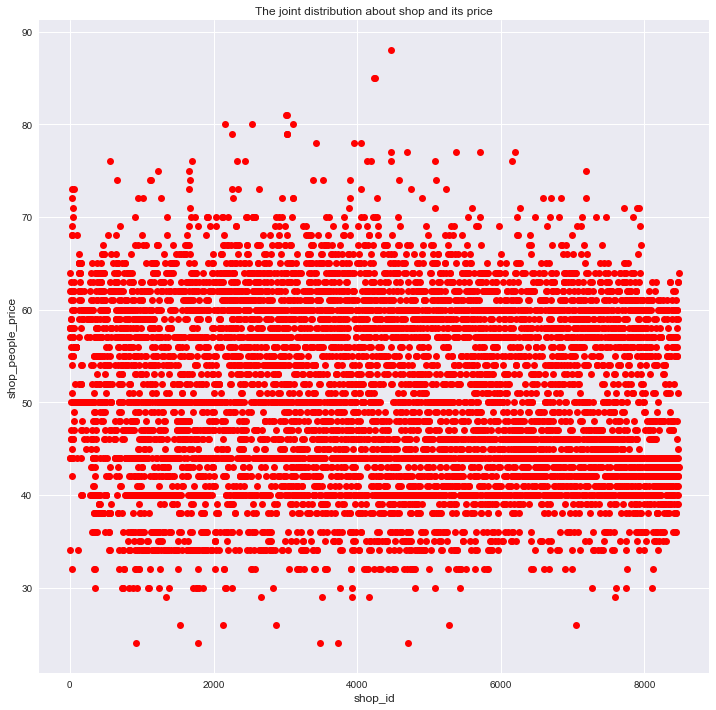

In [42]:
# 绘制人均消费指数和商场之间的关系
# 直方图已经不适用，因为商场id太多
# 也就是画联合分布
plt.figure(figsize=(12,12))
plt.subplot(111)
shop_ids = list(shop_info["shop_id"])
y = shop_info["price"]
plt.plot(range(len(shop_ids)),y, "ro")
plt.xlabel("shop_id", fontsize=12)
plt.ylabel("shop_people_price", fontsize=12)
# plt.xticks(range(len(shop_ids)), list(shop_ids), rotation=45)
plt.title("The joint distribution about shop and its price")
plt.show()

### 可以发现中等消费水平的商店占绝大多数，大概消费水平为35-65，但可以发现35-40之间有一个断层
找到此断层

In [49]:
shop_info[[shop_info["price"] > 30] and shop_info["price"] < 40]["price"].value_counts() 

36    164
34    163
38    151
39    137
35     90
32     68
30     29
29      6
26      5
24      5
Name: price, dtype: int64

#### 可以发现没有31 和33

In [50]:
# 地图可视化
import plotly 
plotly.tools.set_credentials_file(username='tenyun', api_key='Ik8UJy2gVS7FABEGqolg')

In [59]:
import plotly.plotly as py
from plotly.graph_objs import *
mapbox_access_token = "pk.eyJ1IjoidGVueXVuIiwiYSI6ImNqOTg1eGpmbTBlb2IzM2xzbGs4NjBjdzIifQ.kcCjwpqWbfj2U9X7zE0TSQ"
site_lon = shop_info["longitude"]
site_lat = shop_info["latitude"]
locations_name = shop_info["shop_id"]

data = Data([
    Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=Marker(
            size=8,
            color='rgb(0，255，0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    )]
)
        
layout = Layout(
    title='Shop Location View',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=site_lat.mean(),
            lon=site_lon.mean()
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Nuclear Waste Sites on American Campuses')

In [6]:
user_shop_behavior_info = pd.read_csv("ccf_first_round_user_shop_behavior.csv")

In [7]:
user_shop_behavior_info.head()

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos
0,u_376,s_2871718,2017-08-06 21:20,122.308291,32.088040,b_6396480|-67|false;b_41124514|-86|false;b_287...
1,u_376,s_2871718,2017-08-06 21:20,122.308162,32.087970,b_6396480|-67|false;b_56328155|-73|false;b_411...
2,u_1041,s_181637,2017-08-02 13:10,117.365255,40.638214,b_8006367|-78|false;b_2485110|-52|false;b_3005...
3,u_1158,s_609470,2017-08-13 12:30,121.134451,31.197416,b_26250579|-73|false;b_26250580|-64|false;b_26...
4,u_1654,s_3816766,2017-08-25 19:50,122.255867,31.351320,b_39004150|-66|false;b_39004148|-58|false;b_21...


In [8]:
shop_info.shape

(8477, 6)

In [9]:
shop_info.describe()

,longitude,latitude,price
count,8477.000000,8477.000000,8477.000000
mean,117.426526,32.961908,50.527309
std,4.367982,4.687368,9.416713
min,104.414352,23.157355,24.000000
25%,114.829869,30.911022,43.000000
50%,118.192157,32.181703,50.000000
75%,120.927247,36.827750,59.000000
max,123.801593,42.367802,88.000000


In [10]:
shop_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8477 entries, 0 to 8476
Data columns (total 6 columns):
shop_id        8477 non-null object
category_id    8477 non-null object
longitude      8477 non-null float64
latitude       8477 non-null float64
price          8477 non-null int64
mall_id        8477 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 397.4+ KB


In [11]:
user_shop_behavior_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138015 entries, 0 to 1138014
Data columns (total 6 columns):
user_id       1138015 non-null object
shop_id       1138015 non-null object
time_stamp    1138015 non-null object
longitude     1138015 non-null float64
latitude      1138015 non-null float64
wifi_infos    1138015 non-null object
dtypes: float64(2), object(4)
memory usage: 52.1+ MB


In [12]:
user_shop_behavior_info.describe()

,longitude,latitude
count,1.138015e+06,1.138015e+06
mean,1.174162e+02,3.286613e+01
std,4.359182e+00,4.392070e+00
min,-1.139504e+02,5.364270e-01
25%,1.146429e+02,3.097768e+01
50%,1.180478e+02,3.208677e+01
75%,1.210030e+02,3.525854e+01
max,1.271192e+02,5.110064e+01


In [13]:
user_shop_behavior_info.count()

user_id       1138015
shop_id       1138015
time_stamp    1138015
longitude     1138015
latitude      1138015
wifi_infos    1138015
dtype: int64

In [14]:
evaluation_public = pd.read_csv("evaluation_public.csv") 

In [15]:
evaluation_public.head()

,row_id,user_id,mall_id,time_stamp,longitude,latitude,wifi_infos
0,118742,u_30097142,m_3916,2017-09-05 13:00,122.141011,39.818847,b_34366982|-82|false;b_37756289|-53|false;b_41...
1,118743,u_30097803,m_5085,2017-09-06 13:10,118.191907,32.855858,b_36722251|-81|false;b_10537579|-75|false;b_43...
2,118744,u_30097889,m_4033,2017-09-06 17:40,119.192110,32.424667,b_30026291|-74|false;b_30026290|-74|false;b_36...
3,118745,u_30098996,m_4515,2017-09-03 12:10,120.612201,34.055249,b_33412374|-77|false;b_22084893|-86|false;b_52...
4,118746,u_30099170,m_7168,2017-09-02 20:40,116.861989,40.326858,b_19882704|-77|false;b_2241462|-49|false;b_585...


In [16]:
import numpy as np

In [17]:
arr = np.arange(16).reshape((2,2,4))

In [18]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [19]:
arr.shape

(2, 2, 4)

In [20]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [21]:
arr.reshape((2,2,4))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [2]:
evaluation = pd.read_csv("./evaluation_public.csv")

In [3]:
evaluation.head()

,row_id,user_id,mall_id,time_stamp,longitude,latitude,wifi_infos
0,118742,u_30097142,m_3916,2017-09-05 13:00,122.141011,39.818847,b_34366982|-82|false;b_37756289|-53|false;b_41...
1,118743,u_30097803,m_5085,2017-09-06 13:10,118.191907,32.855858,b_36722251|-81|false;b_10537579|-75|false;b_43...
2,118744,u_30097889,m_4033,2017-09-06 17:40,119.192110,32.424667,b_30026291|-74|false;b_30026290|-74|false;b_36...
3,118745,u_30098996,m_4515,2017-09-03 12:10,120.612201,34.055249,b_33412374|-77|false;b_22084893|-86|false;b_52...
4,118746,u_30099170,m_7168,2017-09-02 20:40,116.861989,40.326858,b_19882704|-77|false;b_2241462|-49|false;b_585...
